#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행 
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - 데이터프레임에 대한 기본 정보를 확인합니다.( .head(), .shape 등)

#### 1) 데이터 로딩

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/2023/AIVLE/miniproject5/2023.04.12_미니프로젝트5차_3_5일차 실습자료/data01_train.csv')
features = pd.read_csv('/content/drive/MyDrive/2023/AIVLE/miniproject5/2023.04.12_미니프로젝트5차_3_5일차 실습자료/features.csv')

In [4]:
data = data.drop(['subject'], axis = 1)

In [5]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


#### 2) 기본 정보 조회

In [15]:
gr_mu = data.groupby('Activity').mean() #.iloc[:, 1 :]
gr_mu

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,0.271483,-0.018417,-0.107785,-0.960691,-0.937412,-0.942267,-0.963064,-0.937771,-0.941047,-0.909996,...,0.160376,-0.354266,-0.665671,0.014092,0.015730,0.020949,-0.001137,0.515353,-0.442074,-0.442538
SITTING,0.272837,-0.012072,-0.106352,-0.983166,-0.937754,-0.940105,-0.985014,-0.937914,-0.937808,-0.926686,...,0.175852,-0.376696,-0.678580,0.014437,0.000735,0.011727,-0.031514,-0.690639,-0.005482,-0.096410
STANDING,0.278693,-0.016679,-0.107184,-0.985546,-0.937629,-0.943353,-0.988146,-0.938838,-0.941242,-0.922856,...,0.102096,-0.357825,-0.665034,0.007544,0.014301,0.005826,0.022757,-0.772145,0.210669,0.043542
WALKING,0.275589,-0.017413,-0.109834,-0.308924,-0.019184,-0.245919,-0.346738,-0.053647,-0.249090,-0.100020,...,0.120874,-0.062677,-0.393210,0.026759,-0.015779,-0.004320,-0.016623,-0.757127,0.219866,0.067278
WALKING_DOWNSTAIRS,0.290086,-0.016740,-0.105793,0.137657,0.073628,-0.172184,0.071761,0.018639,-0.194114,0.439378,...,0.096655,-0.321526,-0.665569,-0.054241,-0.032976,0.176974,-0.066018,-0.779684,0.197577,0.057130
WALKING_UPSTAIRS,0.261603,-0.026729,-0.120764,-0.222087,-0.005984,-0.145224,-0.280200,-0.023569,-0.137355,-0.012986,...,0.091210,-0.360494,-0.679241,0.032069,0.001185,-0.142824,0.042089,-0.630221,0.282750,0.130762


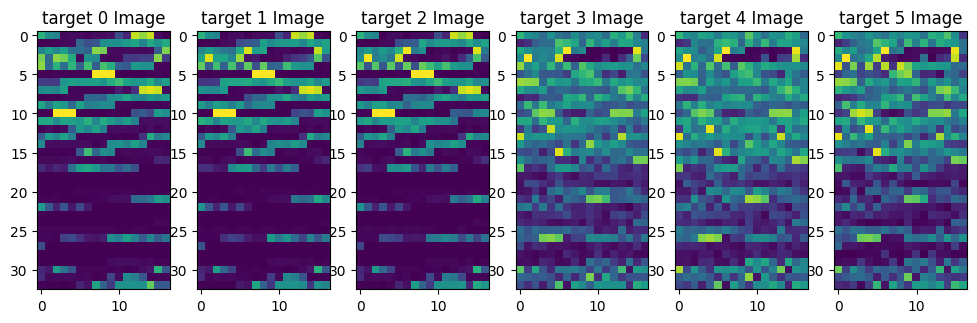

In [17]:
f, a = plt.subplots(1, 6, figsize = (12, 6))
for i in range(6) :
    a[i].set_title(f'target {i} Image')
    a[i].imshow(np.array(gr_mu.iloc[i]).reshape(33, 17))

## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다. 


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [6]:
X = data.drop(['Activity'], axis = 1) #'subject'
y = data['Activity']

In [ ]:
label_dict = {
    'STANDING': 0,
    'LAYING': 1,
    'WALKING': 2,
    'WALKING_DOWNSTAIRS': 3,
    'WALKING_UPSTAIRS': 4,
    'SITTING': 5
}

y2 = data.replace({'Activity' : label_dict}).copy()['Activity']

### (2) 스케일링(필요시)


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(X)

# 데이터 변환
mMscaled_data = mMscaler.transform(X)

# 데이터 프레임으로 저장
X_sc = pd.DataFrame(mMscaled_data, columns = X.columns)

In [9]:
X_sc

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.526878,0.401033,0.448319,0.005507,0.019335,0.016125,0.005500,0.018720,0.017175,0.035126,...,0.488133,0.249657,0.093564,0.472577,0.477891,0.654361,0.537449,0.201725,0.900647,0.578396
1,0.511749,0.396653,0.450918,0.005224,0.002718,0.006117,0.004906,0.002821,0.006221,0.031332,...,0.375973,0.376595,0.156521,0.462253,0.694229,0.117569,0.887502,0.680309,0.156150,0.420272
2,0.520362,0.397878,0.445641,0.001140,0.009789,0.002830,0.001033,0.008760,0.002492,0.028708,...,0.708258,0.225505,0.087117,0.494210,0.237489,0.054098,0.511768,0.084172,0.813468,0.478444
3,0.527733,0.385400,0.424823,0.384137,0.518471,0.330830,0.363222,0.515313,0.326042,0.504144,...,0.531583,0.495352,0.301955,0.365002,0.806402,0.874258,0.464438,0.153833,0.870783,0.551238
4,0.597564,0.426728,0.545615,0.544245,0.466164,0.305633,0.494765,0.452314,0.326814,0.792066,...,0.497705,0.417223,0.223002,0.471641,0.077366,0.012683,0.056187,0.149176,0.855762,0.564555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.519354,0.399138,0.434013,0.002977,0.030931,0.041172,0.002869,0.033852,0.045956,0.031890,...,0.532643,0.342081,0.158131,0.476425,0.369282,0.304459,0.061314,0.044320,0.753647,0.535461
5877,0.462416,0.414401,0.447413,0.436516,0.458287,0.336149,0.403739,0.452190,0.352357,0.539322,...,0.675157,0.181148,0.061611,0.859210,0.811576,0.934035,0.277715,0.156635,0.881634,0.472671
5878,0.513228,0.395601,0.446280,0.004348,0.005200,0.004678,0.003807,0.005372,0.004382,0.031951,...,0.694492,0.193850,0.057709,0.524518,0.614370,0.842747,0.392437,0.819464,0.380712,0.206199
5879,0.476525,0.377925,0.439500,0.479313,0.549190,0.207188,0.449643,0.519943,0.222646,0.609907,...,0.521662,0.597411,0.483596,0.626061,0.775871,0.028132,0.068685,0.142611,0.874641,0.507571


### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [10]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=1)  

## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다. 
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.
    - (옵션) 알고리즘 중 1~2개에 대해서, 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것이다.

### (1) 알고리즘1 : 

In [15]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# 2단계: 선언하기
model = DecisionTreeClassifier()

# 3단계: 학습하기
model.fit(X_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(X_test)

# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[331   0   0   0   0   0]
 [  0 263  29   0   0   0]
 [  0  37 294   0   0   0]
 [  0   0   0 277  10  10]
 [  0   0   0  10 220   9]
 [  0   0   0   9  18 248]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.88      0.90      0.89       292
          STANDING       0.91      0.89      0.90       331
           WALKING       0.94      0.93      0.93       297
WALKING_DOWNSTAIRS       0.89      0.92      0.90       239
  WALKING_UPSTAIRS       0.93      0.90      0.92       275

          accuracy                           0.93      1765
         macro avg       0.92      0.92      0.92      1765
      weighted avg       0.93      0.93      0.93      1765



In [ ]:
# 데이터프레임 만들기 
perf_dic = {'feature':list(X_sc), 'importance': model.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 100))
plt.barh(df['feature'], df['importance'])
plt.show()

### (2) 알고리즘2 : 

In [18]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
from sklearn import metrics
from sklearn.model_selection import cross_val_score


# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear', C = 10, penalty = 'l2', max_iter = 500) 
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(lr_clf , X_sc, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9805 0.9881 0.9787 0.9864 0.9838]
평균 검증 정확도: 0.9835


In [24]:
y.unique()

array(['STANDING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', 'SITTING'], dtype=object)

### (3) 알고리즘3 : 

In [33]:
y2

0       0
1       1
2       0
3       2
4       3
       ..
5876    5
5877    4
5878    1
5879    4
5880    5
Name: Activity, Length: 5881, dtype: int64

In [ ]:
import xgboost as xgb 
from sklearn.model_selection import cross_val_score

xg = xgb.XGBClassifier()

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(xg , X_sc, y2, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

### (4) 알고리즘4 : 

In [ ]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

cb = CatBoostClassifier(bootstrap_type= 'Bayesian', #['Bayesian', 'Bernoulli', 'MVS'] #class_weights= class_weights, 
                     )
# cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, class_weights= class_weights, bootstrap_type= 'MVS', #['Bayesian', 'Bernoulli', 'MVS']
#                      subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(cb , X_sc, y, scoring='accuracy',cv=2)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

### (4) 알고리즘 : 

In [ ]:
from lightgbm import LGBMClassifier


lgbm = LGBMClassifier()

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(lgbm , X_sc, y2, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))


### (5) 알고리즘 : 

In [21]:
from sklearn import svm

svc = svm.SVC(kernel = 'linear', C= 10) #{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(svc , X_sc, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))


교차 검증별 정확도: [0.9796 0.9881 0.9753 0.9847 0.9872]
평균 검증 정확도: 0.983


## 4. 딥러닝

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

In [37]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_sc, y2, test_size=0.3, random_state=1)  

In [25]:
# X_train_d = np.array(X_train).reshape(-1, 33, 17, 1)
# X_test_d = np.array(X_test).reshape(-1, 33, 17, 1)

In [43]:
X = np.array(X).reshape(-1, 33, 17, 1)

In [48]:
ohe = OneHotEncoder(sparse = False)
y = ohe.fit_transform(np.array(y2).reshape(-1, 1))

skf = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True) #10번 반복

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
es = EarlyStopping(monitor = 'val_acc', patience = 10, mode = 'max', verbose = 0)
rlrp = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, mode='max')

# 콜백함수 중 ReduceLROnPlateau를 새롭게 알게되어 써봤습니다. factor는 0.1보다는 0.2가 더 좋은 성능을 보였습니다

In [50]:
y3

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [54]:
y.shape

(5881, 6)

In [ ]:
# cnn_acc = []
# cnn_pred = np.zeros((X_test_d.shape[0], 6))
for i, (tr_idx, val_idx) in enumerate(skf.split(X, y2)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = X[tr_idx], y[tr_idx]
    val_x, val_y = X[val_idx], y[val_idx]
    
    ### CNN 모델
    cnn = Sequential()
    cnn.add(Conv2D(64, (2, 4), padding = "same", activation = 'elu', input_shape = (33,17, 1))) # 정사각필터보다 직사각필터가 좋은 성능
    cnn.add(BatchNormalization())
    
    cnn.add(Conv2D(32, (2, 4), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    
    cnn.add(Conv2D(16, (3, 4), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    
    cnn.add(Conv2D(32, (3, 4), padding = "same", activation = 'elu'))
    
    cnn.add(BatchNormalization())
    cnn.add(GlobalAveragePooling2D())
    
    cnn.add(Dense(16, activation = 'relu'))
    cnn.add(Dense(6, activation = 'softmax'))

    ### ModelCheckPoint Fold마다 갱신
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 1)
   
    ### 모델 compile
    cnn.compile(optimizer = RMSprop(learning_rate=0.04), loss = 'categorical_crossentropy', metrics = ['acc'])

    cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 50, batch_size = 32, callbacks = [es, mc, rlrp], verbose = 1)

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    # fold_pred = best.predict(y) / skf.n_splits
    # cnn_pred += fold_pred

In [63]:
cnn_acc

[0.9898132427843803,
 0.9915110356536503,
 0.9931972789115646,
 0.9863945578231292,
 0.9965986394557823,
 0.9880952380952381]

In [64]:
np.mean(cnn_acc) # 정확도들의 평균이 0.99로 나왔습니다.


0.9909349987872909

In [ ]:
# submission = pd.read_csv('sample_submission.csv')

# submission['target'] = np.argmax(cnn_pred, axis = 1)

# submission

# submission.to_csv('submission.csv',index=False)

## pretrained

In [105]:
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1

In [93]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

In [108]:
X = np.array(X).reshape(-1, 11, 17, 3)

In [84]:
img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1)
    ],
    
    name = 'img_augmentation'
)

In [86]:
X.shape

(5881, 11, 17, 3)

In [101]:
def build_model(NUM_CLASSES):
    inputs = layers.Input(shape=(33, 17, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    return model

In [109]:
# cnn_acc = []
# cnn_pred = np.zeros((X_test_d.shape[0], 6))
for i, (tr_idx, val_idx) in enumerate(skf.split(X, y2)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = X[tr_idx], y[tr_idx]
    val_x, val_y = X[val_idx], y[val_idx]
    
    ### ModelCheckPoint Fold마다 갱신
    #mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 1)

    ### 모델 compile
    inputs = layers.Input(shape=(11, 17, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB1(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(6, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    
    model.compile(optimizer = RMSprop(learning_rate=0.04), loss = 'categorical_crossentropy', metrics = ['acc'])
    model.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 50, batch_size = 32, callbacks = [es, rlrp], verbose = 1)
    
    # tf.saved_model.save()
    # ### 최고 성능 기록 모델 Load
    # best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    # fold_pred = best.predict(y) / skf.n_splits
    # cnn_pred += fold_pred

1 Fold Training.....


ValueError: ignored